In [1]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
token = user_secrets.get_secret("github_repos_wildcard")

In [2]:
repo_url = f"https://{token}@github.com/gaserSami/panther.git"
branch = "autotuner"

In [3]:
!git clone -b {branch} {repo_url}

Cloning into 'panther'...
remote: Enumerating objects: 2307, done.
remote: Counting objects: 100% (296/296), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 2307 (delta 258), reused 248 (delta 238), pack-reused 2011 (from 1)
Receiving objects: 100% (2307/2307), 38.82 MiB | 18.53 MiB/s, done.
Resolving deltas: 100% (1533/1533), done.
Updating files: 100% (198/198), done.


In [4]:
# First uninstall existing torch, torchvision, torchaudio
!pip uninstall -y torch torchvision torchaudio

# Install the specified versions from PyTorch's official CUDA 12.4 wheels
!pip install torch==2.6.0+cu124 torchvision==0.21.0+cu124 torchaudio==2.6.0+cu124 --index-url https://download.pytorch.org/whl/cu124

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.7 

In [5]:
!mv panther Panther

In [6]:
!ls

Panther


In [7]:
# %%writefile /kaggle/working/Panther/pawX/setup.py
# from setuptools import setup
# from torch.utils.cpp_extension import BuildExtension, CUDAExtension

# setup(
#     name="pawX",
#     ext_modules=[
#         CUDAExtension(
#             name="pawX",
#             sources=[
#                 "skops.cpp",
#                 "bindings.cpp",
#                 "linear.cpp",
#                 "linear_cuda.cu",
#                 "cqrrpt.cpp",
#                 "rsvd.cpp",
#                 "attention.cpp",
#                 "conv2d.cpp"
#             ],
#             # Use system includes and libraries
#             include_dirs=["/usr/include/x86_64-linux-gnu"],
#             library_dirs=[],
#             libraries=["openblas"],
#             extra_compile_args={"cxx": ["-O2", "-fopenmp"], "nvcc": ["-O2"]},
#             extra_link_args=["-llapacke", "-lopenblas"]
#         )
#     ],
#     cmdclass={"build_ext": BuildExtension},
# )

In [8]:
!sudo apt-get install liblapacke-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  liblapacke libtmglib-dev libtmglib3
Suggested packages:
  liblapack-doc
The following NEW packages will be installed:
  liblapacke liblapacke-dev libtmglib-dev libtmglib3
0 upgraded, 4 newly installed, 0 to remove and 87 not upgraded.
Need to get 1,071 kB of archives.
After this operation, 12.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libtmglib3 amd64 3.10.0-2ubuntu1 [144 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblapacke amd64 3.10.0-2ubuntu1 [435 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libtmglib-dev amd64 3.10.0-2ubuntu1 [134 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblapacke-dev amd64 3.10.0-2ubuntu1 [358 kB]
Fetched 1,071 kB in 1s (996 kB/s)       
debconf: unable to initialize frontend: Dialog
debconf: (No usable dia

In [9]:
!cd /kaggle/working/Panther/pawX; python setup.py install
!cd /kaggle/working/Panther/pawX; pip install --no-build-isolation -e .

Detected system: linux
[OK] CUDA is available. Detected device capability: 7.5
[OK] Tensor Core support detected based on device capability.
[INFO] Using CUDA source file: ['linear_tc.cu']
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ******************************************************************************

In [10]:
import torch
print(torch.__version__)
import triton
print(triton.__version__)

2.6.0+cu124
3.2.0


In [11]:
import os
os.chdir("/kaggle/working/Panther")

In [12]:
!pwd

/kaggle/working/Panther


In [13]:
!pip install botorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.3/738.3 kB 11.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.7/277.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.9 MB/s eta 0:00:00


In [14]:
import copy
import os
import random

import torch
import torch.nn as nn

from panther.utils import *
from panther.tuner import (
    ConfigVisualizer,
    EvolutionaryAlgorithm,
    GridSearch,
    Hyperband,
    LayerConfig,
    ModelVisualizer,
    ParticleSwarmOptimization,
    RandomSearch,
    SearchAlgorithm,
    SimulatedAnnealing,
    SKAutoTuner,
    TreeParzenEstimator,
    TuningConfigs,
)

# For reproducibility
torch.manual_seed(0)
random.seed(0)

# 1. Define a simple PyTorch model
import torch.nn as nn

class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Input: 3 channels, e.g., (batch_size, 3, 64, 64)

        # We need out_channels > 1024 and < 7000
        self.conv1 = nn.Conv2d(
            in_channels=3, out_channels=2048, kernel_size=3, padding=1
        )
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Output after pool1: (batch_size, 2048, 32, 32)

        # Add another pooling layer to further reduce spatial dimensions
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Output after pool2: (batch_size, 2048, 16, 16)

        self.flatten = nn.Flatten()
        # Calculate new flattened size based on output of pool2
        # (out_channels from conv1 * H_after_pool2 * W_after_pool2)
        # 2048 * 16 * 16 = 524288
        flattened_size = 2048 * 16 * 16

        # One fully connected layer
        # Input features must be new flattened_size (reduced)
        # Output features needs to be > 1024 and < 7000 (maintained)
        self.fc1 = nn.Linear(flattened_size, 4096)

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.pool1(x)
        x = self.pool2(x) # Apply the second pooling layer
        x = self.flatten(x)
        x = self.fc1(x)
        return x

# 2. Define evaluation functions
def dummy_accuracy_eval_func(model: nn.Module) -> float:
    """
    A dummy accuracy evaluation function.
    In a real scenario, this would evaluate the model on a validation dataset.
    This function gives slightly higher accuracy if layers are sketched.
    """
    base_accuracy = 0.6
    sketched_bonus = 0.0
    num_sketched = 0
    for module in model.modules():
        if "SK" in type(module).__name__:  # Check if it's a sketched layer
            sketched_bonus += 0.05
            num_sketched += 1
            # Example: Favor specific sketch parameters for variety in results
            if hasattr(module, "num_terms") and hasattr(module, "low_rank"):
                if module.num_terms > 15:  # Arbitrary condition for demo
                    sketched_bonus += 0.02
                if module.low_rank < 10:  # Arbitrary condition for demo
                    sketched_bonus += 0.01

    # Simulate some noise or dependency on parameters
    if num_sketched > 0:
        # Small random factor to make tuning non-deterministic if not for seed
        return min(1.0, base_accuracy + sketched_bonus + random.uniform(-0.01, 0.01))
    return base_accuracy + random.uniform(-0.01, 0.01)


def dummy_optimization_eval_func(model: nn.Module) -> float:
    """
    A dummy optimization evaluation function (e.g., inference speed).
    Higher is better. This function simulates that sketched layers are faster.
    """
    simulated_latency = 0.05  # Base latency
    for module in model.modules():
        if isinstance(module, (nn.Linear, nn.Conv2d)):
            params = sum(p.numel() for p in module.parameters())
            if "SK" in type(module).__name__:  # Sketched layer
                simulated_latency += 0.0000005 * params  # Sketched layers are faster
            else:  # Original layer
                simulated_latency += 0.0000025 * params

    # Score is inverse of latency (higher score = faster)
    return 1.0 / simulated_latency if simulated_latency > 0 else 0.0

In [15]:
print("SKAutoTuner Example Script")
print("==========================")

# Create dummy input for model (batch_size=1, 3 channels, 32x32 image)
dummy_input = torch.randn(1, 3, 32, 32)

# --- Initial Model ---
original_model = SimpleModel()

SKAutoTuner Example Script


In [16]:
print("\n--- Original Model Summary ---")
# To use print_model_summary, we need a tuner instance with the model
# temp_tuner_orig = SKAutoTuner(original_model, TuningConfigs([]), lambda m: 0.0)
# temp_tuner_orig.print_model_summary()

# --- Configuration for Tuning ---
# Define which layers to tune and with what parameters
# Note: Keep parameter ranges small for quick example execution.
tuning_configs = TuningConfigs(configs=[
    LayerConfig(
        layer_names=["fc1"],
        params={'num_terms': [1, 2, 3], 'low_rank': [32, 64, 128, 16]},
        separate=True,  # Tune this layer group separately
        copy_weights=True,
    ),
    # LayerConfig(
    #     layer_names=["conv1"],
    #     params="auto",
    #     separate=True,  # Tune this layer group separately
    #     copy_weights=True,
    # )
])


--- Original Model Summary ---


In [17]:
# Create a copy of the model for the main tuning process
model_for_tuning = copy.deepcopy(original_model)

In [18]:
# --- Instantiate SKAutoTuner ---
print("\n--- Initializing SKAutoTuner for Tuning ---")
tuner = SKAutoTuner(
    model=model_for_tuning,
    configs=tuning_configs,
    accuracy_eval_func=dummy_accuracy_eval_func,
    optmization_eval_func=dummy_optimization_eval_func,
    accuracy_threshold=0.65,  # Aim for at least this accuracy
    verbose=True,
    num_runs_per_param=1,  # For faster example execution
)


--- Initializing SKAutoTuner for Tuning ---


In [19]:
print(tuner.getConfigs())

TuningConfigs(configs=[LayerConfig(layer_names=['fc1'], params={'num_terms': [1, 2, 3], 'low_rank': [32, 64, 128, 16]}, separate=True, copy_weights=True)])


In [20]:
# --- 1. Tune the model ---
print("\n--- Starting Tuning Process (tune) ---")
tuner.tune()
print("Tuning finished.")

# --- 2. Get Best Parameters ---
print("\n--- Best Parameters Found (get_best_params) ---")
best_params = tuner.get_best_params()
for layer_name, params_info in best_params.items():
    print(f"Layer: {layer_name}, Best Params: {params_info['params']}")

# --- 3. Get Results DataFrame ---
print("\n--- Tuning Results DataFrame (get_results_dataframe) ---")
# This requires pandas to be installed.
try:
    results_df = tuner.get_results_dataframe()
    print(results_df.to_string())
except ImportError:
    print("Pandas not installed. Skipping get_results_dataframe().")
except Exception as e:
    print(f"Could not generate DataFrame: {e}")


--- Starting Tuning Process (tune) ---
Tuning layer: fc1
Trying parameters: {'num_terms': 1, 'low_rank': 32}
Replaced fc1 with sketched version using parameters: {'num_terms': 1, 'low_rank': 32}
run: 1/1 - accuracy_score: 0.656888437030501, speed_score: 5.171700455109639, final score: 5.171700455109639
Tried parameters: {'num_terms': 1, 'low_rank': 32}, accuracy_score: 0.656888437030501, speed_score: 5.171700455109639, final score: 5.171700455109639
Trying parameters: {'num_terms': 1, 'low_rank': 64}
Replaced fc1 with sketched version using parameters: {'num_terms': 1, 'low_rank': 64}
run: 1/1 - accuracy_score: 0.6551590880588061, speed_score: 5.171700455109639, final score: 5.171700455109639
Tried parameters: {'num_terms': 1, 'low_rank': 64}, accuracy_score: 0.6551590880588061, speed_score: 5.171700455109639, final score: 5.171700455109639
Trying parameters: {'num_terms': 1, 'low_rank': 128}
Replaced fc1 with sketched version using parameters: {'num_terms': 1, 'low_rank': 128}
run: 1

In [21]:
tuner.get_best_params()

{'fc1': {'params': {'num_terms': 1, 'low_rank': 32},
  'copy_weights': True,
  'best_layer': SKLinear()}}

In [22]:
# --- 4. Apply Best Parameters ---
print("\n--- Applying Best Parameters to the Model (apply_best_params) ---")
# tuner.model is modified in-place by apply_best_params()
tuned_model_explicit_return = tuner.apply_best_params()
print("Model summary before tuning:")
summary = ModelVisualizer.get_model_summary_data(original_model, None)
print(summary)
print("Best parameters applied. Model summary after tuning:")
summary = ModelVisualizer.get_model_summary_data(tuned_model_explicit_return, None)
print(summary)

# --- 5. Visualize Tuning Results ---
print("\n--- Visualizing Tuning Results (visualize_tuning_results) ---")
# This requires matplotlib and pandas.
# Create a directory for plots if it doesn't exist.
viz_dir = "tuning_visualizations"
if not os.path.exists(viz_dir):
    os.makedirs(viz_dir)
viz_path = os.path.join(viz_dir, "tuning_visualization.png")
try:
    tuner.visualize_tuning_results(save_path=viz_path, show_plot=False)
    print(f"Tuning visualization saved to {viz_path}")
    print("To view the plot, open the saved image file.")
except ImportError:
    print(
        "Matplotlib or Pandas not installed. Skipping visualize_tuning_results()."
    )
except Exception as e:
    print(f"Could not visualize results: {e}")
    if "No variable parameters found to visualize" in str(e):
        print(
            "This can happen if all parameter combinations resulted in the same score or only one combination was tried."
        )


--- Applying Best Parameters to the Model (apply_best_params) ---
debug, data: {'params': {'num_terms': 1, 'low_rank': 32}, 'copy_weights': True, 'best_layer': SKLinear()}
replaced fc1 with SKLinear
Model summary before tuning:
{'total_params': 2147545088, 'sketched_layers': 0, 'layers': [{'name': 'conv1', 'type': 'Conv2d', 'params': 57344, 'is_sketched': False}, {'name': 'relu1', 'type': 'ReLU', 'params': 0, 'is_sketched': False}, {'name': 'pool1', 'type': 'MaxPool2d', 'params': 0, 'is_sketched': False}, {'name': 'pool2', 'type': 'MaxPool2d', 'params': 0, 'is_sketched': False}, {'name': 'flatten', 'type': 'Flatten', 'params': 0, 'is_sketched': False}, {'name': 'fc1', 'type': 'Linear', 'params': 2147487744, 'is_sketched': False}]}
Best parameters applied. Model summary after tuning:
{'total_params': 16969728, 'sketched_layers': 0, 'layers': [{'name': 'conv1', 'type': 'Conv2d', 'params': 57344, 'is_sketched': False}, {'name': 'relu1', 'type': 'ReLU', 'params': 0, 'is_sketched': False},

/kaggle/working/Panther/panther/tuner/SkAutoTuner/SKAutoTuner.py:833: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/kaggle/working/Panther/panther/tuner/SkAutoTuner/SKAutoTuner.py:837: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Visualization saved to tuning_visualizations/tuning_visualization.png
Tuning visualization saved to tuning_visualizations/tuning_visualization.png
To view the plot, open the saved image file.

--- Explicit call to get_model_summary (on tuned model) ---


AttributeError: 'SKAutoTuner' object has no attribute 'get_model_summary'


--- Explicit call to get_model_summary (on tuned model) ---


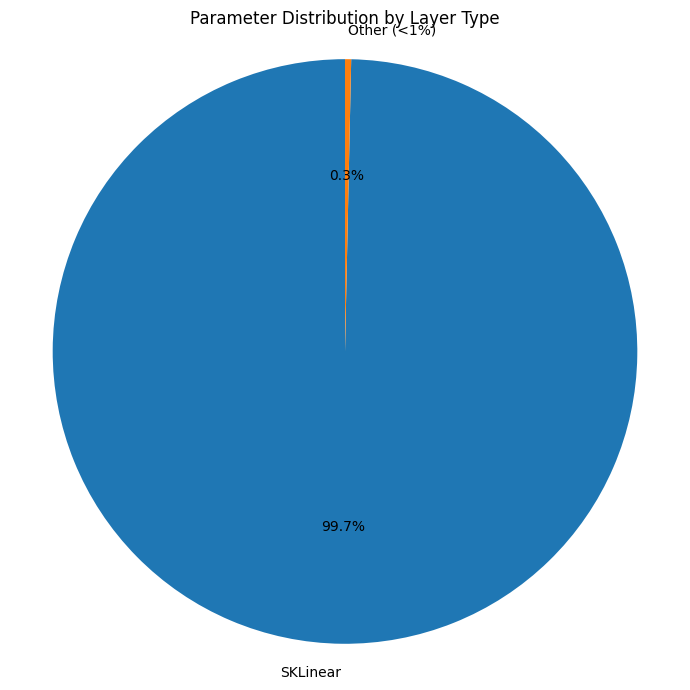

Model Comparison Summary: Original Model vs Tuned Model
--------------------------------------------------------------------------------
Original Model parameters: 2,147,545,088
Tuned Model parameters:    16,969,728
Parameter reduction:       2,130,575,360 (99.21%)
--------------------------------------------------------------------------------
Layer Differences:
Layer Name                          Original Model Type  Tuned Model Type     Original Model Params Tuned Model Params Param Diff     
--------------------------------------------------------------------------------------------------------------------------------------
fc1                                 Linear               SKLinear             2,147,487,744   16,912,384      2,130,575,360  


In [24]:
# --- 7. Get Model Summary (Explicitly from Tuned Model) ---
print("\n--- Explicit call to get_model_summary (on tuned model) ---")
# tuner.print_model_summary() was already called after apply_best_params,
# this shows how to get the raw dictionary.

ModelVisualizer.visualize_parameter_distribution(
   model = tuned_model_explicit_return, is_sketched_func=None, save_path="/tmp/", show_plot=True
)

# Ensure original_model is pristine.
ModelVisualizer.print_comparison_summary_text(original_model, tuned_model_explicit_return)